In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#bring in the hard drive dataset
df_train = pd.read_csv('../input/harddrive.csv')

In [3]:
#Check out the columns
df_train.columns

Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized',
       'smart_22_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'smart_191_raw',
       'smart_1

In [4]:
#descriptive statistics summary
df_train.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_22_normalized,smart_22_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,smart_188_raw,smart_189_normalized,smart_189_raw,...,smart_196_normalized,smart_196_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_200_normalized,smart_200_raw,smart_201_normalized,smart_201_raw,smart_220_normalized,smart_220_raw,smart_222_normalized,smart_222_raw,smart_223_normalized,smart_223_raw,smart_224_normalized,smart_224_raw,smart_225_normalized,smart_225_raw,smart_226_normalized,smart_226_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
count,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,1.259118e+06,1.259118e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,1.259124e+06,1.259124e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,146814.000000,146814.000000,3.179295e+06,3.179295e+06,6.000000,6.000000,0.0,0.0,2340.0,2340.0,1.799457e+06,1.799457e+06,1.806516e+06,1.806516e+06,1.806516e+06,1.806516e+06,1.806516e+06,3.179295e+06,1.806458e+06,1.806458e+06,...,1.372837e+06,1.372837e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,3.179295e+06,146814.000000,146814.000000,6.0,6.000000,9910.0,9910.0,9910.000000,9910.000000,43005.000000,43005.000000,9910.0,9910.0,33095.000000,33095.000000,9910.0,9910.000000,1.816462e+06,3.179295e+06,1.803634e+06,3.179295e+06,1.803634e+06,3.179295e+06,2835.0,2.835000e+03,2835.000000,2.835000e+03,2835.000000,2.835000e+03,7935.000000,7935.0,0.0,0.0
mean,1.849552e-311,6.762506e-05,1.121816e+02,6.856751e+07,1.287652e+02,7.491735e+01,1.052967e+02,3.655617e+02,9.999833e+01,1.353609e+01,1.051400e+02,2.052975e+00,9.304675e+01,4.593638e-314,1.159485e+02,2.920851e+01,9.199964e+01,1.594910e+04,1.015793e+02,2.527455e+01,101.302103,41.063720,9.999974e+01,1.130873e+01,89.166667,1010.500000,NaN,NaN,100.0,100.0,9.970454e+01,4.461218e+00,9.999511e+01,4.893397e-03,9.996584e+01,4.076980e-01,1.000000e+02,5.542036e-316,9.753200e+01,1.423065e+01,...,1.118915e+02,1.872857e+00,1.051586e+02,8.567528e-02,1.017998e+02,7.555763e-02,1.999856e+02,2.659917e+01,104.715497,11311.852466,99.0,65.500000,100.0,0.0,80.897175,7836.238951,104.445227,140.186699,100.0,0.0,89.825805,107764.929476,100.0,366.954390,9.995598e+01,5.374454e-311,1.000739e+02,5.472978e-314,1.000739e+02,2.401220e-313,1.0,1.020068e+08,6.412698,1.948479e+08,19.822222,8.940533e+07,116.131065,0.0,NaN,NaN
std,0.000000e+00,8.223169e-03,1.871325e+01,8.002785e+07,2.488450e+01,4.557482e+01,1.870145e+01,1.089088e+03,1.412369e-01,1.498674e+02,2.392430e+01,1.396621e+02,2.221795e+01,0.000000e+00,2.411822e+01,1.806539e+01,8.381080e+00,1.254640e+04,1.542909e+01,2.723216e+03,14.038571,185.474543,6.472665e-02,6.817288e+01,21.283014,295.856553,NaN,NaN,0.0,0.0,3.744400e+00,3.293027e+02,1.650107e-01,1.650107e-01,7.428963e-01,1.446441e+02,2.682564e-03,0.000000e+00,6.769637e+00,7.488966e+02,...,3.530015e+01,3.703745e+01,2.390744e+01,1.450909e+01,1.609518e+01,1.098149e+01,1.200152e+00,1.873707e+03,21.363304,34105.037629,0.0,28.974126,0.0,0.0,3.990556,1584.286679,25.668107,321.785925,0.0,0.0,9.754812,98554.877858,0.0,30.268082,1.108840e+00,0.000000e+00,2.716549e+00,0.000000e+00,2.716549e+00,0.000000e+00,0.0,7.223558e+

In [5]:
#Look into failure distributions
df_train['failure'].value_counts()

0    3179080
1        215
Name: failure, dtype: int64

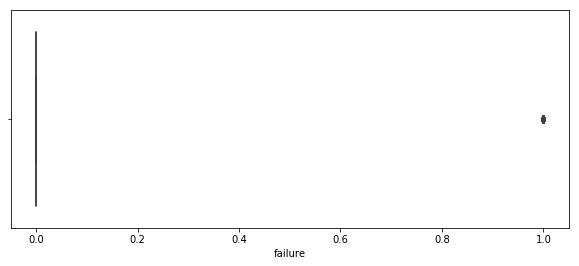

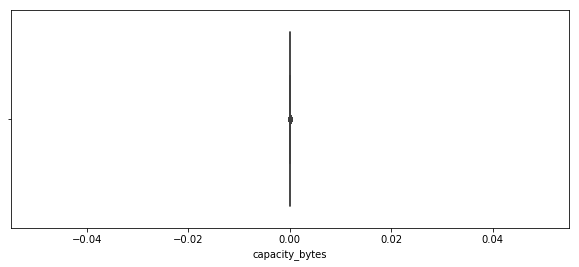

In [6]:
#Box Plot of capacity_bytes and failure
plt.figure(figsize=(10,4))
sns.boxplot(x=df_train['failure'])

plt.figure(figsize=(10,4))
sns.boxplot(x=df_train['capacity_bytes'])

In [7]:
#Obtain the failed hard rive disks into dataframe
hard_drive_failure_data = df_train[df_train['failure'] == 1]
hard_drive_failure_data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_22_normalized,smart_22_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,...,smart_196_normalized,smart_196_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_200_normalized,smart_200_raw,smart_201_normalized,smart_201_raw,smart_220_normalized,smart_220_raw,smart_222_normalized,smart_222_raw,smart_223_normalized,smart_223_raw,smart_224_normalized,smart_224_raw,smart_225_normalized,smart_225_raw,smart_226_normalized,smart_226_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
30285,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,0,100,4,200,0,100,0.000000e+00,NaN,NaN,88,8807,100,0,100.0,0.0,100,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200.0,0.0,200,0,100,0,200,0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31847,2016-01-01,Z300KHN0,ST4000DM000,1.976651e-311,1,110,26281840,NaN,NaN,91,0,100,12,100,0,85,1.983112e-315,NaN,NaN,79,19246,100,0,NaN,NaN,100,12,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,100,40,100,40,200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,6.255644e-310,100.0,1.168777e-313,100.0,1.126168e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37041,2016-01-01,Z3015V4D,ST4000DM000,1.976651e-311,1,115,88716600,NaN,NaN,92,0,100,25,100,0,77,2.536507e-316,NaN,NaN,82,16177,100,0,NaN,NaN,100,25,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,100,56,100,56,200,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,7.830940e-320,100.0,1.103291e-313,100.0,1.512541e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46720,2016-01-01,W3006E5B,ST4000DM000,1.976651e-311,1,117,143154896,NaN,NaN,91,0,100,22,100,0,87,2.345134e-315,NaN,NaN,77,20929,100,0,NaN,NaN,100,22,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,100.0,0.0,100.0,0.0,100.0,...,NaN,NaN,100,0,100,0,200,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,8.281937e-310,100.0,1.234518e-313,100.0,1.316288e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87830,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,0,100,4,200,0,100,0.000000e+00,NaN,NaN,88,8807,100,0,100.0,0.0,100,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,200.0,0.0,200,0,100,0,200,0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Checkout the features and non-nulls
hard_drive_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 30285 to 3139403
Data columns (total 95 columns):
date                    215 non-null object
serial_number           215 non-null object
model                   215 non-null object
capacity_bytes          215 non-null float64
failure                 215 non-null int64
smart_1_normalized      215 non-null int64
smart_1_raw             215 non-null int64
smart_2_normalized      27 non-null float64
smart_2_raw             27 non-null float64
smart_3_normalized      215 non-null int64
smart_3_raw             215 non-null int64
smart_4_normalized      215 non-null int64
smart_4_raw             215 non-null int64
smart_5_normalized      215 non-null int64
smart_5_raw             215 non-null int64
smart_7_normalized      215 non-null int64
smart_7_raw             215 non-null float64
smart_8_normalized      27 non-null float64
smart_8_raw             27 non-null float64
smart_9_normalized      215 non-null int64
smart_9_raw     

In [9]:
#Find the lifetime of failed hard drives
lifetimes = []
for index, row in hard_drive_failure_data.iterrows():
    start_date = hard_drive_failure_data.iloc[0]['date']
    #print(start_date)
    end_date = row['date']
    #print(end_date)

    time_difference = pd.to_datetime(end_date) - pd.to_datetime(start_date)
    lifetimes.append(time_difference.days)
    
hard_drive_failure_data['lifetime'] = lifetimes
hard_drive_failure_data.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,smart_7_raw,smart_8_normalized,smart_8_raw,smart_9_normalized,smart_9_raw,smart_10_normalized,smart_10_raw,smart_11_normalized,smart_11_raw,smart_12_normalized,smart_12_raw,smart_13_normalized,smart_13_raw,smart_15_normalized,smart_15_raw,smart_22_normalized,smart_22_raw,smart_183_normalized,smart_183_raw,smart_184_normalized,smart_184_raw,smart_187_normalized,smart_187_raw,smart_188_normalized,...,smart_196_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_200_normalized,smart_200_raw,smart_201_normalized,smart_201_raw,smart_220_normalized,smart_220_raw,smart_222_normalized,smart_222_raw,smart_223_normalized,smart_223_raw,smart_224_normalized,smart_224_raw,smart_225_normalized,smart_225_raw,smart_226_normalized,smart_226_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw,lifetime
30285,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,0,100,4,200,0,100,0.000000e+00,NaN,NaN,88,8807,100,0,100.0,0.0,100,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,200,0,100,0,200,0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
31847,2016-01-01,Z300KHN0,ST4000DM000,1.976651e-311,1,110,26281840,NaN,NaN,91,0,100,12,100,0,85,1.983112e-315,NaN,NaN,79,19246,100,0,NaN,NaN,100,12,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,100.0,0.0,100.0,0.0,100.0,...,NaN,100,40,100,40,200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,6.255644e-310,100.0,1.168777e-313,100.0,1.126168e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
37041,2016-01-01,Z3015V4D,ST4000DM000,1.976651e-311,1,115,88716600,NaN,NaN,92,0,100,25,100,0,77,2.536507e-316,NaN,NaN,82,16177,100,0,NaN,NaN,100,25,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,100.0,0.0,100.0,0.0,100.0,...,NaN,100,56,100,56,200,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,7.830940e-320,100.0,1.103291e-313,100.0,1.512541e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
46720,2016-01-01,W3006E5B,ST4000DM000,1.976651e-311,1,117,143154896,NaN,NaN,91,0,100,22,100,0,87,2.345134e-315,NaN,NaN,77,20929,100,0,NaN,NaN,100,22,NaN,NaN,NaN,NaN,NaN,NaN,100.0,0.0,100.0,0.0,100.0,0.0,100.0,...,NaN,100,0,100,0,200,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,8.281937e-310,100.0,1.234518e-313,100.0,1.316288e-312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
87830,2016-01-01,WD-WCC4MKDL77ZK,WDC WD20EFRX,9.883284e-312,1,200,0,NaN,NaN,100,0,100,4,200,0,100,0.000000e+00,NaN,NaN,88,8807,100,0,100.0,0.0,100,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,200,0,100,0,200,0,100.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [10]:
#Fliter failed hard drives that have lifetime larger than 0
filtered_hard_drive_failure_data = hard_drive_failure_data[hard_drive_failure_data['lifetime'] > 0]
filtered_hard_drive_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 123475 to 3139403
Data columns (total 96 columns):
date                    207 non-null object
serial_number           207 non-null object
model                   207 non-null object
capacity_bytes          207 non-null float64
failure                 207 non-null int64
smart_1_normalized      207 non-null int64
smart_1_raw             207 non-null int64
smart_2_normalized      27 non-null float64
smart_2_raw             27 non-null float64
smart_3_normalized      207 non-null int64
smart_3_raw             207 non-null int64
smart_4_normalized      207 non-null int64
smart_4_raw             207 non-null int64
smart_5_normalized      207 non-null int64
smart_5_raw             207 non-null int64
smart_7_normalized      207 non-null int64
smart_7_raw             207 non-null float64
smart_8_normalized      27 non-null float64
smart_8_raw             27 non-null float64
smart_9_normalized      207 non-null int64
smart_9_raw    

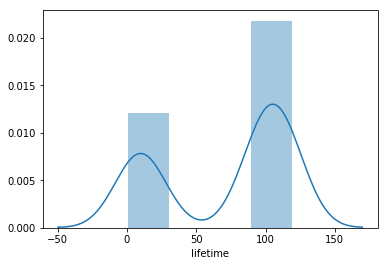

In [11]:
#Distribution of the lifetime
sns.distplot(filtered_hard_drive_failure_data['lifetime']); 

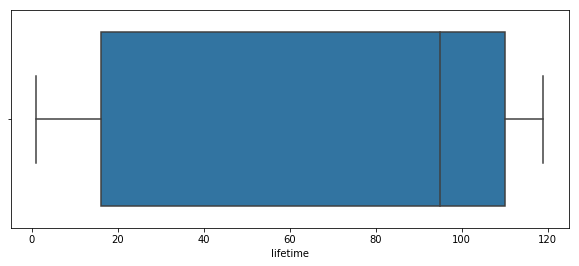

In [12]:
#Box Plot of the lifetime
plt.figure(figsize=(10,4))
sns.boxplot(x=filtered_hard_drive_failure_data['lifetime'])

In [20]:
filtered_hard_drive_failure_data.to_csv('hard_drive_with_lifetime.csv', index = False)

In [13]:
#Save the dataframe with lifetime as csv file
#hard_drive_with_lifetime = filtered_hard_drive_failure_data.to_csv(index=False)